In [119]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e7/sample_submission.csv
/kaggle/input/playground-series-s5e7/train.csv
/kaggle/input/playground-series-s5e7/test.csv


In [120]:
df_train = pd.read_csv('/kaggle/input/playground-series-s5e7/train.csv')
df_test = pd.read_csv('/kaggle/input/playground-series-s5e7/test.csv')
sub = pd.read_csv('/kaggle/input/playground-series-s5e7/sample_submission.csv')

In [121]:
sub.head()

,id,Personality
0,18524,Extrovert
1,18525,Extrovert
2,18526,Extrovert
3,18527,Extrovert
4,18528,Extrovert


In [122]:
df_test.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,18524,3.0,No,7.0,4.0,No,6.0,NaN
1,18525,NaN,Yes,0.0,0.0,Yes,5.0,1.0
2,18526,3.0,No,5.0,6.0,No,15.0,9.0
3,18527,3.0,No,4.0,4.0,No,5.0,6.0
4,18528,9.0,Yes,1.0,2.0,Yes,1.0,1.0


In [123]:
df_train.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


In [124]:
df_train.describe()

,id,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,18524.000000,17334.000000,17344.000000,17058.000000,17470.000000,17260.000000
mean,9261.500000,3.137764,5.265106,4.044319,7.996737,4.982097
std,5347.562529,3.003786,2.753359,2.062580,4.223484,2.879139
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4630.750000,1.000000,3.000000,3.000000,5.000000,3.000000
50%,9261.500000,2.000000,5.000000,4.000000,8.000000,5.000000
75%,13892.250000,4.000000,8.000000,6.000000,12.000000,7.000000
max,18523.000000,11.000000,10.000000,7.000000,15.000000,10.000000


In [125]:
df_test.isnull().sum()

id                             0
Time_spent_Alone             425
Stage_fear                   598
Social_event_attendance      397
Going_outside                466
Drained_after_socializing    432
Friends_circle_size          350
Post_frequency               408
dtype: int64

In [126]:
df_train.isnull().sum()

id                              0
Time_spent_Alone             1190
Stage_fear                   1893
Social_event_attendance      1180
Going_outside                1466
Drained_after_socializing    1149
Friends_circle_size          1054
Post_frequency               1264
Personality                     0
dtype: int64

#  **Cleaning DataSet**

In [127]:
df_train.replace([np.inf, -np.inf], np.nan, inplace=True)
df_test.replace([np.inf, -np.inf], np.nan, inplace=True)

In [128]:
intcol = ['Time_spent_Alone','Social_event_attendance',	'Going_outside', 'Friends_circle_size',	'Post_frequency']
for col in intcol:
    df_train[col] = df_train[col].interpolate()
    df_test[col] = df_test[col].interpolate()

In [129]:
catcol = ['Stage_fear', 'Drained_after_socializing']
for col in catcol:
    val = df_train[col].mode()[0]
    df_train[col] = df_train[col].fillna(val)
    val2 = df_test[col].mode()[0]
    df_test[col] = df_test[col].fillna(val2)

In [130]:
csv_df = pd.DataFrame(df_test['id'])

In [131]:
csv_df.head()

,id
0,18524
1,18525
2,18526
3,18527
4,18528


In [132]:
df_train.shape

(18524, 9)

In [133]:
df_train = df_train.drop(['id'],axis =1)
df_test = df_test.drop(['id'],axis =1)

In [134]:
df_test.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,3.0,No,7.0,4.0,No,6.0,NaN
1,3.0,Yes,0.0,0.0,Yes,5.0,1.0
2,3.0,No,5.0,6.0,No,15.0,9.0
3,3.0,No,4.0,4.0,No,5.0,6.0
4,9.0,Yes,1.0,2.0,Yes,1.0,1.0


In [135]:
df_train.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,6.0,Yes,1.0,0.0,No,3.0,0.0,Introvert
3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,1.0,No,4.0,4.0,No,13.0,4.0,Extrovert


# **Encoding**

In [136]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
column = ['Stage_fear', 'Drained_after_socializing']

for col in column:
    df_train[col] = le.fit_transform(df_train[col])
    print(col)
    print(le.classes_)
    df_test[col] = le.transform(df_test[col])

df_train['Personality'] = le.fit_transform(df_train['Personality'])
print(le.classes_)

Stage_fear
['No' 'Yes']
Drained_after_socializing
['No' 'Yes']
['Extrovert' 'Introvert']


In [137]:
df_train.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0.0,0,6.0,4.0,0,15.0,5.0,0
1,1.0,0,7.0,3.0,0,10.0,8.0,0
2,6.0,1,1.0,0.0,0,3.0,0.0,1
3,3.0,0,7.0,3.0,0,11.0,5.0,0
4,1.0,0,4.0,4.0,0,13.0,4.0,0


In [138]:
df_test.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,3.0,0,7.0,4.0,0,6.0,NaN
1,3.0,1,0.0,0.0,1,5.0,1.0
2,3.0,0,5.0,6.0,0,15.0,9.0
3,3.0,0,4.0,4.0,0,5.0,6.0
4,9.0,1,1.0,2.0,1,1.0,1.0


In [139]:
#no need of scaling
#so now lets do visualizations

# *Visualization***

In [140]:
import seaborn as sns
import warnings
import matplotlib.pyplot as plt

In [141]:
X = df_train.drop(['Personality'],axis =1)
y = df_train['Personality']

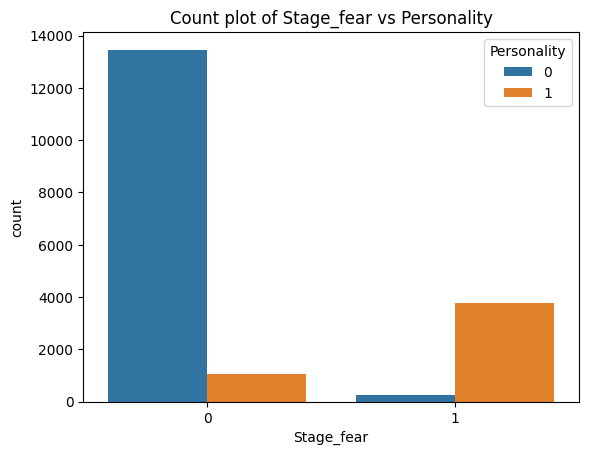

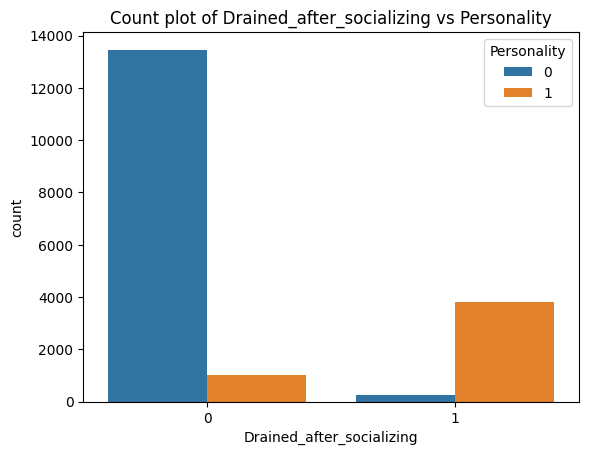

In [142]:
ls = ['Stage_fear', 'Drained_after_socializing']
for col in ls:
    sns.countplot(x=col ,data = df_train,hue = 'Personality')
    plt.title(f'Count plot of {col} vs Personality')
    plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


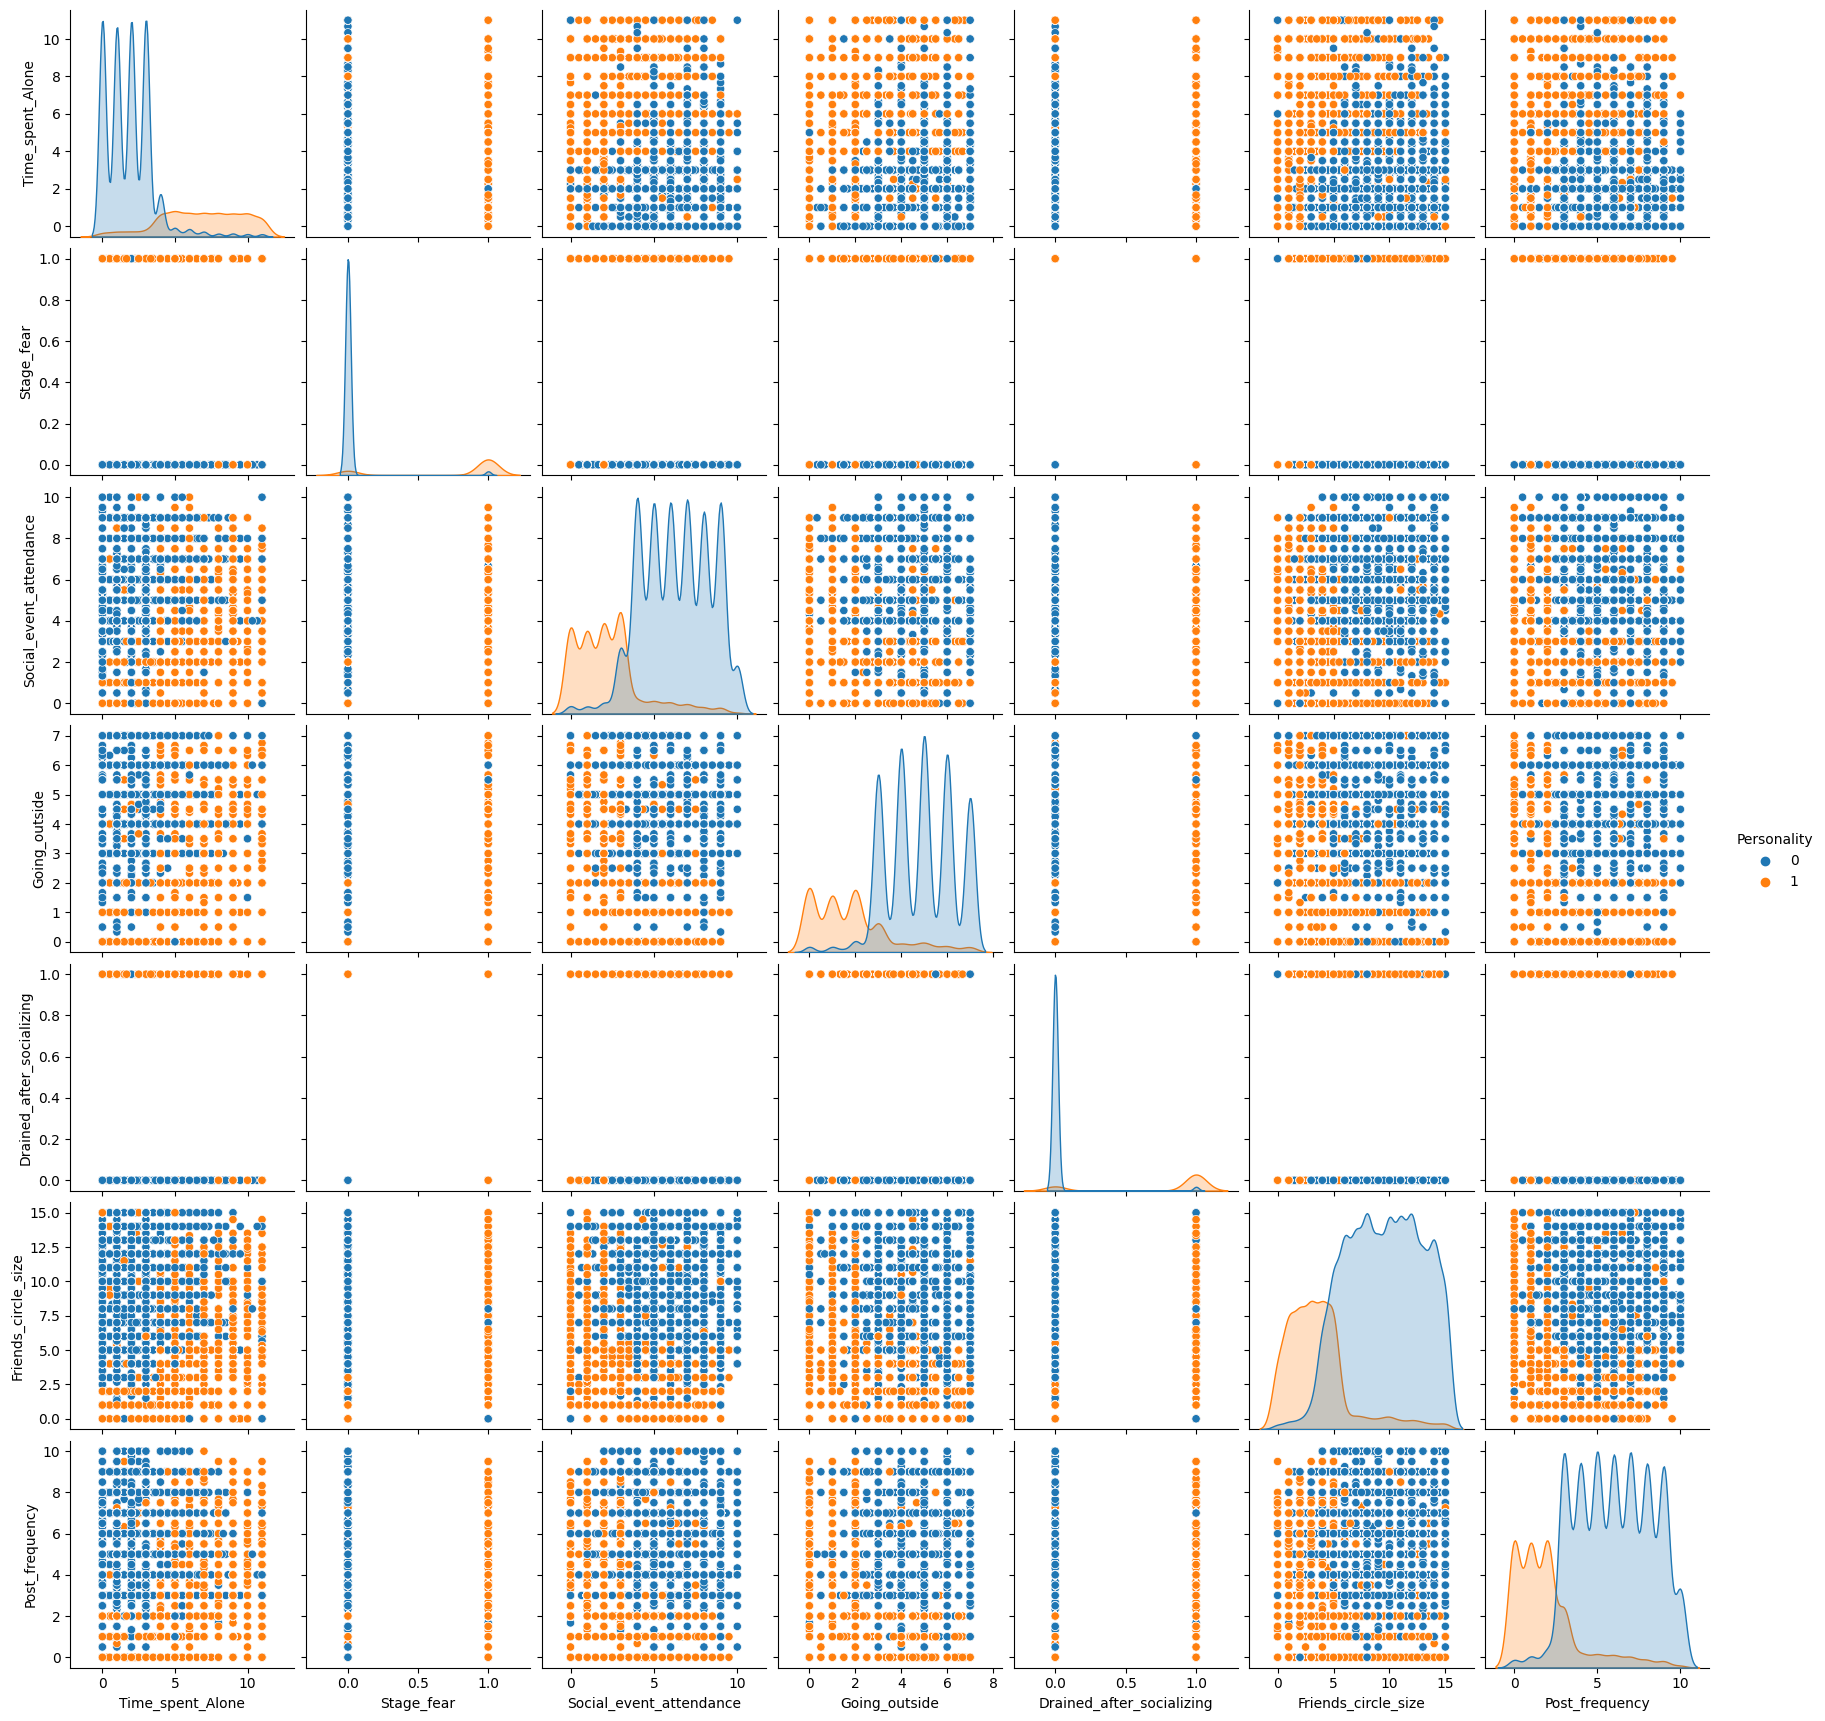

In [143]:
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.pairplot(df_train,hue='Personality')

In [144]:
# This is Binary Classification

# **Model Building**

In [145]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state=42)

In [146]:
from sklearn.model_selection import GridSearchCV

param = {
    'n_estimators' : [20,35,50],
    'learning_rate' : [0.01,0.1],
    'max_depth' : [5,6,7,9],
    'eval_metric' : ['logloss']
}

search = GridSearchCV(estimator = xgb.XGBClassifier(),param_grid = param,cv=10,scoring='accuracy',n_jobs=-1)

search.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'eval_metric': ['logloss'],
                         'learning_rate': [0.01, 0.1],
                         'max_depth': [5, 6, 7, 9],
                         'n_estimators': [20, 35, 50]},
             scoring='accuracy')

In [147]:
search.best_params_

{'eval_metric': 'logloss',
 'learning_rate': 0.1,
 'max_depth': 7,
 'n_estimators': 35}

In [148]:
search.best_score_

0.9686220238176597

In [149]:
model = xgb.XGBClassifier(eval_metric = 'logloss',
 learning_rate = 0.1,
 max_depth = 6,
 n_estimators = 35)

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print(accuracy_score(y_pred,y_test))

0.968421052631579


In [150]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [151]:
def objective(trial):
    classifier_name = trial.suggest_categorical(
        'classifier',
        ['SVC', 'LogisticRegression', 'RandomForestClassifier', 'GradientBoostingClassifier', 'xgboost']
    )

    if classifier_name == 'SVC':
        svc_c = trial.suggest_float('svc_c', 1e-10, 1e10, log = True)
        kernel = trial.suggest_categorical('kernel', ['rbf', 'linear', 'poly', 'sigmoid'])
        gamma = trial.suggest_categorical('gamma', ['scale', 'auto'] + [1/X_train.shape[1]])

        model = SVC(C=svc_c, kernel=kernel, gamma=gamma, random_state=42)

    elif classifier_name == 'RandomForestClassifier':
        model = RandomForestClassifier(
            n_estimators = trial.suggest_int('n_estimators',50,300),
            max_depth = trial.suggest_int('max_depth',3,20),
            min_samples_split = trial.suggest_int('min_samples_split',2,10),
            min_samples_leaf = trial.suggest_int('min_samples_leaf', 1,10),
            bootstrap = trial.suggest_categorical('bootstrap', [True,False]),
            random_state = 42
        )
        
    elif classifier_name == 'GradientBoostingClassifier':
        model = GradientBoostingClassifier(
            n_estimators = trial.suggest_int('n_estimators',50,300),
            learning_rate = trial.suggest_float('learning_rate',0.001, 1, log=True),
            max_depth = trial.suggest_int('max_depth',3,20),
            min_samples_split = trial.suggest_int('min_samples_split',2,10),
            min_samples_leaf = trial.suggest_int('min_samples_leaf', 1,10),
            random_state = 42
        )

    elif classifier_name == 'LogisticRegression':
        C = trial.suggest_float('C',0.01,1.0)
        solver = trial.suggest_categorical('solver', ['liblinear', 'lbfgs', 'sag', 'saga'])
        penalty = trial.suggest_categorical('penalty', ['l1','l2'])

        valid_combos = {
            'liblinear': ['l1','l2'],
            'lbfgs': ['l2'],
            'sag' : ['l2'],
            'saga' : ['l1','l2']
        }
        if penalty not in valid_combos.get(solver,[]):
            raise optuna.exceptions.TrialPruned()

        model = LogisticRegression(
            C=C,
            solver = solver,
            penalty = penalty,
            random_state = 42,
            max_iter = 1000
        )

    elif classifier_name == 'xgboost' :
        model = xgb.XGBClassifier(
            n_estimators = trial.suggest_int('n_estimators',50,300),
            learning_rate = trial.suggest_float('learning_rate',0.001, 1, log=True),
            max_depth = trial.suggest_int('max_depth',3,20),
            min_child_weight= trial.suggest_int('min_child_weight',1,10),
            use_label_encoder=False,
            eval_metric='logloss',
            random_state = 42
        )

    else:
        raise ValueError("Unsupported classifier")

    score = cross_val_score(model,X_train,y_train,cv=3,scoring='accuracy').mean()
    return score;

In [152]:
import optuna

study = optuna.create_study(direction='maximize')
study.optimize(objective,n_trials=10)

[I 2025-07-02 17:00:50,577] A new study created in memory with name: no-name-8aa222cd-c8e1-4bdf-8877-410c8dccb90c
[I 2025-07-02 17:00:51,542] Trial 0 finished with value: 0.9687565082126094 and parameters: {'classifier': 'RandomForestClassifier', 'n_estimators': 54, 'max_depth': 8, 'min_samples_split': 4, 'min_samples_leaf': 8, 'bootstrap': False}. Best is trial 0 with value: 0.9687565082126094.
[I 2025-07-02 17:00:52,029] Trial 1 finished with value: 0.9686890591532485 and parameters: {'classifier': 'LogisticRegression', 'C': 0.6830483886998272, 'solver': 'saga', 'penalty': 'l1'}. Best is trial 0 with value: 0.9687565082126094.
[I 2025-07-02 17:00:52,611] Trial 2 finished with value: 0.9674068985755775 and parameters: {'classifier': 'xgboost', 'n_estimators': 191, 'learning_rate': 0.004551761061964613, 'max_depth': 19, 'min_child_weight': 3}. Best is trial 0 with value: 0.9687565082126094.
[I 2025-07-02 17:00:53,321] Trial 3 finished with value: 0.9681491661154068 and parameters: {'cl

In [153]:
best_trial = study.best_trial
print("Best trial:")
print(f"  Value: {best_trial.value}")
print("  Params: ")
for key, value in best_trial.params.items():
    print(f"    {key}: {value}")

Best trial:
  Value: 0.9687565082126094
  Params: 
    classifier: RandomForestClassifier
    n_estimators: 54
    max_depth: 8
    min_samples_split: 4
    min_samples_leaf: 8
    bootstrap: False


In [154]:
study.trials_dataframe()['params_classifier'].value_counts()

params_classifier
xgboost                   4
RandomForestClassifier    3
SVC                       2
LogisticRegression        1
Name: count, dtype: int64

In [155]:
final_model = xgb.XGBClassifier(eval_metric = 'logloss',
 learning_rate = 0.1,
 max_depth = 6,
 n_estimators = 35)

model.fit(X,y)

y_pred = model.predict(df_test)
ls = []

for i in y_pred:
    if i== 1:
        ls.append("Introvert")
    else:
        ls.append("Extrovert")
csv_df['Personality'] = ls

In [156]:
csv_df.to_csv('output.csv', index=False)

print("CSV saved successfully!")

CSV saved successfully!
